In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/project

/content/gdrive/My Drive/project


In [ ]:
!ls

IST_corrected_preprocessed_all.csv  Untitled0.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from keras.callbacks import EarlyStopping
import math

Using TensorFlow backend.


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/project/IST_corrected_preprocessed_all.csv')
df.head(3)

,SEX,AGE,RATRIAL,RVISI00,RASP3,RSBP,RDE01,RDE02,RDE03,RDE04,RDE05,RDE06,RDE07,RDE08,TARGET
0,1,1,1.0,0,0.0,-1,1,1,1,1,0,0,0,1,Coronary heart disease
1,1,1,0.0,1,0.0,-1,1,1,1,1,0,0,0,0,Coronary heart disease
2,1,1,0.0,0,1.0,-1,1,1,1,0,1,1,0,0,Coronary heart disease


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

SEX        0
AGE        0
RATRIAL    0
RVISI00    0
RASP3      0
RSBP       0
RDE01      0
RDE02      0
RDE03      0
RDE04      0
RDE05      0
RDE06      0
RDE07      0
RDE08      0
TARGET     0
dtype: int64

In [ ]:
newlabeldf=df['TARGET'].replace({ 'Alive': 0,'Initial stroke': 1, 'Reccurent ischaemic': 1 ,'Reccurent haemorrhagic stroke': 1, 'Pneumonia': 1, 'Coronary heart disease': 1, 'Pulmonary embolism': 1, 'Other vascular': 1,'Non vascular': 1})
df['TARGET'] = newlabeldf
#df['target'] = newlabeldf
print(df['TARGET'].head())

0    1
1    1
2    1
3    1
4    1
Name: TARGET, dtype: int64


In [ ]:
df.corr()

,SEX,AGE,RATRIAL,RVISI00,RASP3,RSBP,RDE01,RDE02,RDE03,RDE04,RDE05,RDE06,RDE07,RDE08,TARGET
SEX,1.000000,-0.146593,-0.086873,-0.011970,-0.010189,-0.031780,-0.026715,-0.041945,-0.031589,-0.018607,0.020980,0.034085,0.021334,0.065455,-0.062118
AGE,-0.146593,1.000000,0.160340,-0.037226,0.055227,0.058363,0.071827,-0.015759,-0.005760,-0.012455,-0.005780,-0.032051,-0.029284,-0.062651,0.079232
RATRIAL,-0.086873,0.160340,1.000000,0.027282,0.072980,-0.056891,0.114215,0.056810,-0.000005,-0.046131,-0.040691,-0.032005,-0.016725,-0.066933,0.185707
RVISI00,-0.011970,-0.037226,0.027282,1.000000,0.018242,-0.028860,0.036463,0.040108,-0.000795,-0.020191,-0.007788,0.007257,-0.014024,-0.044644,0.063928
RASP3,-0.010189,0.055227,0.072980,0.018242,1.000000,-0.075995,0.147744,0.070412,0.009765,-0.040489,-0.108258,0.001515,-0.020812,-0.033702,0.319740
RSBP,-0.031780,0.058363,-0.056891,-0.028860,-0.075995,1.000000,-0.113837,-0.046060,0.010166,0.047156,0.089988,0.008253,0.015494,0.035545,-0.246017
RDE01,-0.026715,0.071827,0.114215,0.036463,0.147744,-0.113837,1.000000,0.125598,0.050594,-0.075619,-0.159763,-0.016912,-0.034087,-0.049516,0.489794
RDE02,-0.041945,-0.015759,0.056810,0.040108,0.070412,-0.046060,0.125598,1.000000,0.361399,0.155995,-0.000806,0.021256,-0.003585,-0.131036,0.195398
RDE03,-0.031589,-0.005760,-0.000005,-0.000795,0.009765,0.010166,0.050594,0.361399,1.000000,0.419927,-0.024164,0.026256,0.006300,-0.153260,-0.003081
RDE04,-0.018607,-0.012455,-0.046131,-0.020191,-0.040489,0.047156,-0.075619,0.155995,0.419927,1.000000,0.051975,0.038557,0.029216,-0.084697,-0.193938


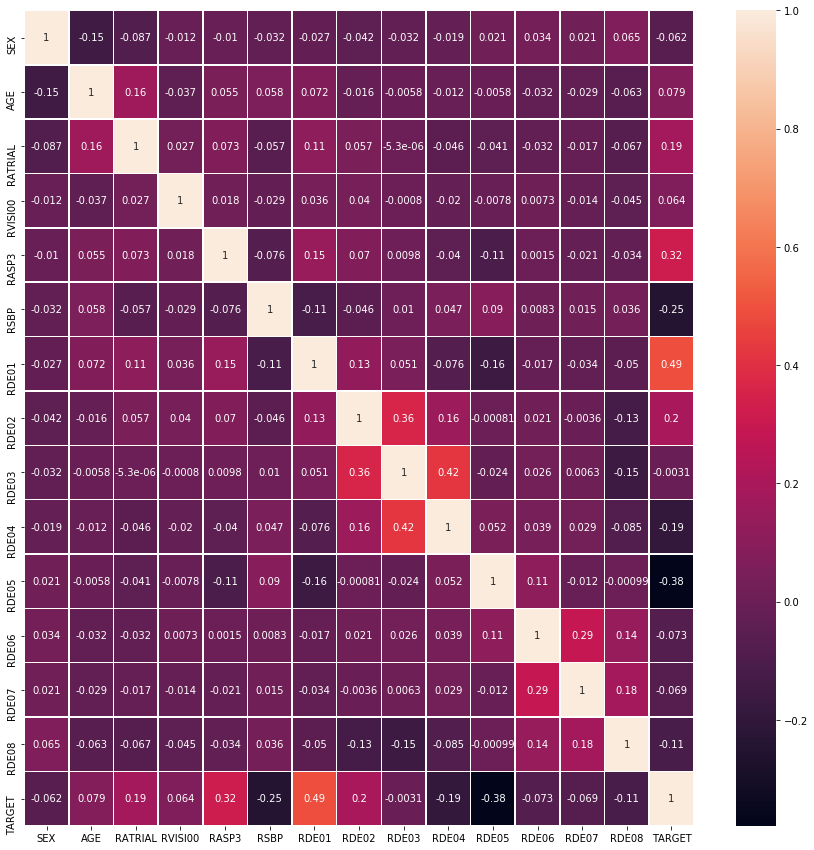

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, linewidths=.5,ax=ax)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["TARGET"])
#check that the target variable has been removed
X.head()

,SEX,AGE,RATRIAL,RVISI00,RASP3,RSBP,RDE01,RDE02,RDE03,RDE04,RDE05,RDE06,RDE07,RDE08
0,1,1,1.0,0,0.0,-1,1,1,1,1,0,0,0,1
1,1,1,0.0,1,0.0,-1,1,1,1,1,0,0,0,0
2,1,1,0.0,0,1.0,-1,1,1,1,0,1,1,0,0
3,0,1,0.0,1,0.0,-1,1,1,1,1,1,1,0,0
4,1,1,0.0,0,0.0,-1,1,1,1,1,-1,-1,0,0


In [ ]:
#separate target values
y = df["TARGET"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
label=df['TARGET']

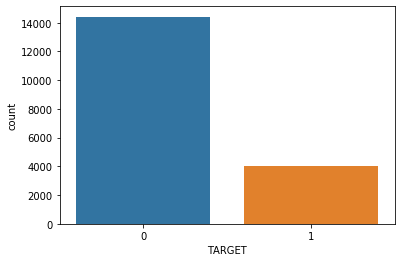

In [ ]:
sns.countplot(label)

In [ ]:
X_train.shape

(14760, 14)

In [ ]:
df.shape

(18451, 15)

In [ ]:
X_test.shape

(3691, 14)

In [ ]:
y_train.shape

(14760,)

In [ ]:
y_test.shape

(3691,)

In [ ]:
X_train=np.expand_dims(X_train, axis=2) 
y_train=np.expand_dims(y_train, axis=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [ ]:
X_train.shape

(14760, 14, 1)

In [ ]:
es=EarlyStopping(patience=7)

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(14,input_shape=(14,1)))
model.add(Dense(output_dim=1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=1,verbose=1,callbacks=[es])

Epoch 1/10
14760/14760 [==============================] - 319s 22ms/step - loss: 0.1863 - acc: 0.9234
Epoch 2/10
    7/14760 [..............................] - ETA: 5:46 - loss: 0.4625 - acc: 0.8571

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


14760/14760 [==============================] - 315s 21ms/step - loss: 0.1759 - acc: 0.9253
Epoch 3/10
14760/14760 [==============================] - 313s 21ms/step - loss: 0.1680 - acc: 0.9308
Epoch 4/10
14760/14760 [==============================] - 313s 21ms/step - loss: 0.1612 - acc: 0.9344
Epoch 5/10
14760/14760 [==============================] - 312s 21ms/step - loss: 0.1562 - acc: 0.9342
Epoch 6/10
14760/14760 [==============================] - 312s 21ms/step - loss: 0.1487 - acc: 0.9390
Epoch 7/10
14760/14760 [==============================] - 313s 21ms/step - loss: 0.1426 - acc: 0.9419
Epoch 8/10
14760/14760 [==============================] - 309s 21ms/step - loss: 0.1411 - acc: 0.9422
Epoch 9/10
14760/14760 [==============================] - 311s 21ms/step - loss: 0.1387 - acc: 0.9418
Epoch 10/10
14760/14760 [==============================] - 309s 21ms/step - loss: 0.1330 - acc: 0.9431


In [ ]:
X_test=np.expand_dims(X_test, axis=2) 
y_test=np.expand_dims(y_test, axis=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [ ]:
model.evaluate(X_test, y_test)

3691/3691 [==============================] - 1s 299us/step


[0.12487193644127527, 0.9460850717962612]

In [ ]:
predict = model.predict(X_test)

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
yhat_probs = model.predict(X_test, verbose=0)

In [ ]:
yhat_classes = model.predict_classes(X_test, verbose=0)

In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

IndexError: ignored

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.946085


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

Precision: 0.917582


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

Recall: 0.827757


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

F1 score: 0.870358


In [ ]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.836437


In [ ]:
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

ROC AUC: 0.984691


In [ ]:
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

[[2824   60]
 [ 139  668]]


Confusion matrix, without normalization
[[2824   60]
 [ 139  668]]


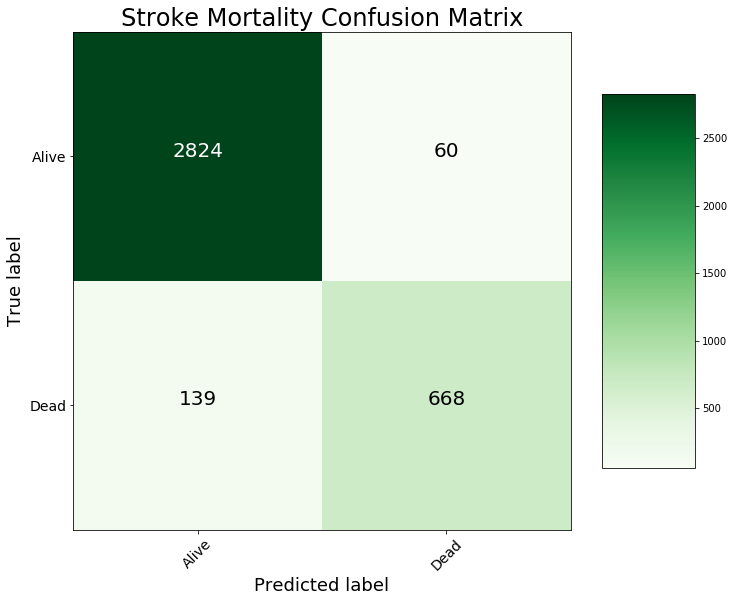

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, yhat_classes)
plot_confusion_matrix(cm, classes = ['Alive', 'Dead'],
                      title = 'Stroke Mortality Confusion Matrix')

LSTM: f1=0.870 auc=0.957


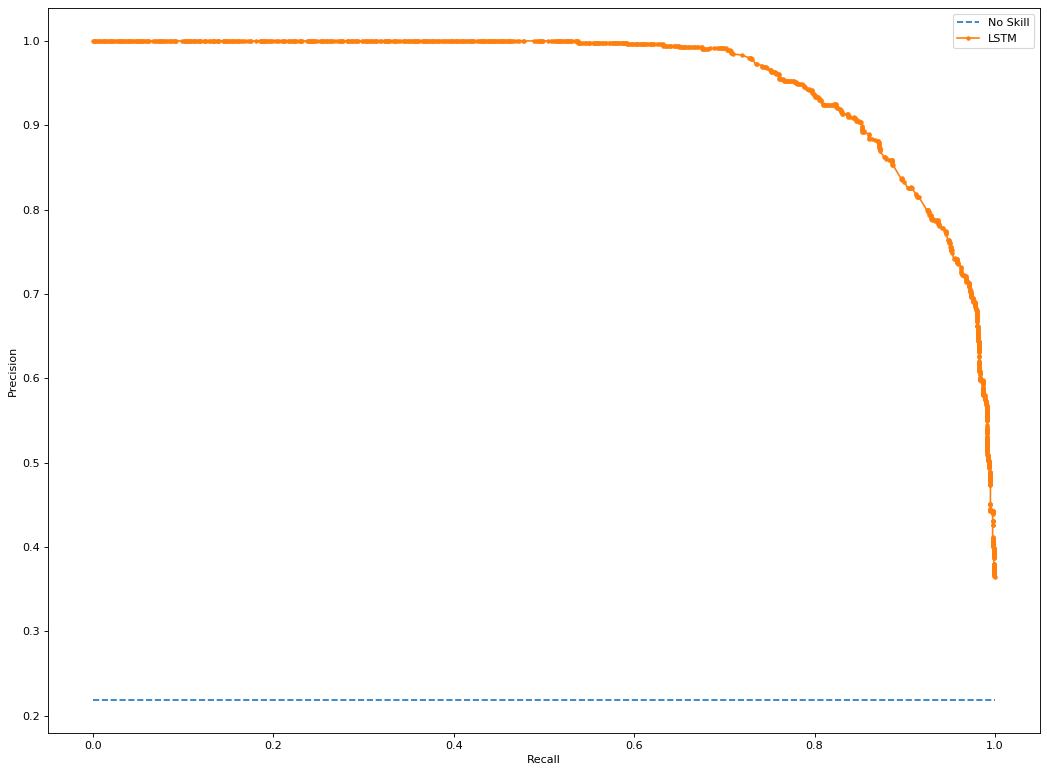

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, yhat_probs)
lr_f1, lr_auc = f1_score(y_test, yhat_classes), auc(lr_recall, lr_precision)
# summarize scores
print('LSTM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='LSTM')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()